# Bernstein-Vazirani Algorithm

Let us assume a black box which has 6 bits (e.g., 100111). How many attempts does a classical computer vs QC takes to figure out those 6 bits?
For 6 bits, you need six tries! In general n bit = n tries!

However, if we have Quantum computer BV algorithm can determine that number is one try, independent of the size of the number.


Classical Computer:
Start with 1001 -> Apply AND with 0001. This will give $000\textbf{1}$.

Start with 1001 -> Apply AND with 0010. This will give $00\textbf{0}0.$

Start with 1001 -> Apply AND with 0100. This will give $0\textbf{0}00$.

Start with 1001 -> Apply AND with 1000. This will give $\textbf{1}000.$


## Bernstein-Vazirani Problem

We are given a blackbox function f, which takes as input string of bits (x), and retruns either 0 or 1.

$f(\{x_0,x_1,x_2,...\}) \rightarrow 0 \textrm{ or } 1 \textrm{ where } x_n \textrm{ is }0 \textrm{ or } 1$

Instead of the function being balanced or constant as in the Deutsch-Josza problem, now the function is guaranteed to return the bitwise product of the input with some string, s.
In other words, given an input x:

$  
f
(
x
)
=
s
⋅
x
(mod 2)$

We are expected to find  s.


## The Classical Solution:

Classically, the oracle returns:
$f_s(x) = s \cdot x \mod 2 $
 
given an input x. Thus, the hidden bit string  
s can be revealed by querying the oracle with the sequence of inputs:

Input(x)

100...0

010...0

001...0

000...1

Where each query reveals a different bit of s. For example, with x = 1000...0 one can obtain the least significant bit of s, with x = 0100...0 we can find the next least significant, and so on. This means we would need to call the function $f_s(x) $, n times.

For example, if s=101000, then you need to query this six times to find s using classical approach. 



In [8]:
bin(21)

'0b10101'

## The Quantum Solution

Using a quantum computer, we can solve this problem with 100% confidence after only one call to the function $f(x)$. The quantum Bernstein-Vazirani algorithm to find the hidden bit string is very simple:

1) Initialise the inputs qubits to the  $|0\rangle^{\otimes n}$ state, and output qubit to $|−⟩$.

2) Apply Hadamard gates to the input register

3) Query the oracle

4) Apply Hadamard gates to the input register

5) Measure

To explain the algorithm, let’s look more closely at what happens when we apply a H-gate to each qubit. If we have an n-qubit state, |a⟩, and apply the H-gates, we will see the transformation:
        
$|a\rangle \xrightarrow{H^{\otimes n}} \frac{1}{\sqrt{2^n}} \sum_{x\in \{0,1\}^n} (-1)^{a\cdot x}|x\rangle.$

Explanation:

$H|0\rangle = \tfrac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$

$H|1\rangle = \tfrac{1}{\sqrt{2}}(|0\rangle - |1\rangle)$

Using summation notation above equation can be written as:

$H|a\rangle = \frac{1}{\sqrt{2}}\sum_{x\in \{0,1\}} (-1)^{a\cdot x}|x\rangle.$


In particular, when we start with a quantum register|00…0⟩ and apply  n Hadamard gates to it, we have the familiar quantum superposition:

$|00\dots 0\rangle \xrightarrow{H^{\otimes n}} \frac{1}{\sqrt{2^n}} \sum_{x\in \{0,1\}^n} |x\rangle $

The algorithm to reveal the hidden bit string follows naturally by querying the quantum oracle  fs with the quantum superposition obtained from the Hadamard transformation of  |00…0⟩. Namely,

$|00\dots 0\rangle \xrightarrow{H^{\otimes n}} \frac{1}{\sqrt{2^n}} \sum_{x\in \{0,1\}^n} |x\rangle \xrightarrow{f_a} \frac{1}{\sqrt{2^n}} \sum_{x\in \{0,1\}^n} (-1)^{a\cdot x}|x\rangle$

Because the inverse of the n Hadamard gates is again the n Hadamard gates, we can obtain a by

$\frac{1}{\sqrt{2^n}} \sum_{x\in \{0,1\}^n} (-1)^{a\cdot x}|x\rangle \xrightarrow{H^{\otimes n}} |a\rangle$



## Let's start with an example

Here we are trying to find string hidden inside the oracle.

n=2

s=11 # This is the secret number. 

1) The register of two qubits is initialized to zero:
$|
ψ
_0
⟩
=
|
0
0
⟩$

2) Apply a Hadamard gate to both qubits:
$\lvert \psi_1 \rangle = \frac{1}{2} \left( \lvert 0 0 \rangle + \lvert 0 1 \rangle + \lvert 1 0 \rangle + \lvert 1 1 \rangle \right)$

3) For the string s=11, the quantum oracle performs the operation:
$|x \rangle \xrightarrow{f_s} (-1)^{x\cdot 11} |x \rangle.$

$\lvert \psi_2 \rangle = \frac{1}{2} \left( (-1)^{00\cdot 11}|00\rangle + (-1)^{01\cdot 11}|01\rangle + (-1)^{10\cdot 11}|10\rangle + (-1)^{11\cdot 11}|11\rangle \right)$
 
$\lvert \psi_2 \rangle = \frac{1}{2} \left( \lvert 0 0 \rangle - \lvert 0 1 \rangle - \lvert 1 0 \rangle + \lvert 1 1 \rangle \right)$
 


4) Apply a hadamard gate to both qubits:
 
$\lvert \psi_3 \rangle = \lvert 1 1 \rangle$  

5) Measure to find the secret string s=11.

## Qiskit Implementation

In [1]:
# initialization
import matplotlib.pyplot as plt
import numpy as np

# importing Qiskit
from qiskit import IBMQ, BasicAer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute

# import basic plot tools
from qiskit.visualization import plot_histogram

In [9]:
n = 14# number of qubits used to represent 's'
s = '11001100110111'   # the hidden binary string

In [10]:
# We need a circuit with n qubits, plus one ancilla qubit
# Also need n classical bits to write the output to
bv_circuit = QuantumCircuit(n+1, n)
# put ancilla in state |->
bv_circuit.h(n)
bv_circuit.z(n)
# Apply Hadamard gates before querying the oracle
for i in range(n):
    bv_circuit.h(i)
 
# Apply barrier 
bv_circuit.barrier()

# Apply the inner-product oracle
s = s[::-1] # reverse s to fit qiskit's qubit ordering
for q in range(n):
    if s[q] == '0':
        bv_circuit.i(q)
    else:
        bv_circuit.cx(q, n)
        
# Apply barrier 
bv_circuit.barrier()

#Apply Hadamard gates after querying the oracle
for i in range(n):
    bv_circuit.h(i)

# Measurement
for i in range(n):
    bv_circuit.measure(i, i)

bv_circuit.draw()

┌───┐      ░                                                    ░ ┌───┐»
 q_0: ┤ H ├──────░───■────────────────────────────────────────────────░─┤ H ├»
      ├───┤      ░   │                                                ░ ├───┤»
 q_1: ┤ H ├──────░───┼─────────■──────────────────────────────────────░─┤ H ├»
      ├───┤      ░   │         │                                      ░ ├───┤»
 q_2: ┤ H ├──────░───┼─────────┼────■─────────────────────────────────░─┤ H ├»
      ├───┤      ░   │  ┌───┐  │    │                                 ░ ├───┤»
 q_3: ┤ H ├──────░───┼──┤ I ├──┼────┼─────────────────────────────────░─┤ H ├»
      ├───┤      ░   │  └───┘  │    │                                 ░ ├───┤»
 q_4: ┤ H ├──────░───┼─────────┼────┼────■────────────────────────────░─┤ H ├»
      ├───┤      ░   │         │    │    │                            ░ ├───┤»
 q_5: ┤ H ├──────░───┼─────────┼────┼────┼────■───────────────────────░─┤ H ├»
      ├───┤      ░   │  ┌───┐  │    │    │    │                       ░ ├───┤»
 q_6: ┤ H ├──────░───┼──┤ I ├──┼────┼────┼────┼───────────────────────░─┤ H ├»
      ├───┤      ░   │  ├───┤  │    │    │    │                       ░ ├───┤»
 q_7: ┤ H ├──────░───┼──┤ I ├──┼────┼────┼────┼───────────────────────░─┤ H ├»
      ├───┤      ░   │  └───┘  │    │    │    │                       ░ ├───┤»
 q_8: ┤ H ├──────░───┼─────────┼────┼────┼────┼────■──────────────────░─┤ H ├»
      ├───┤      ░   │         │    │    │    │    │                  ░ ├───┤»
 q_9: ┤ H ├──────░───┼─────────┼────┼────┼────┼────┼────■─────────────░─┤ H ├»
      ├───┤      ░   │  ┌───┐  │    │    │    │    │    │             ░ ├───┤»
q_10: ┤ H ├──────░───┼──┤ I ├──┼────┼────┼────┼────┼────┼─────────────░─┤ H ├»
      ├───┤      ░   │  ├───┤  │    │    │    │    │    │             ░ ├───┤»
q_11: ┤ H ├──────░───┼──┤ I ├──┼────┼────┼────┼────┼────┼─────────────░─┤ H ├»
      ├───┤      ░   │  └───┘  │    │    │    │    │    │             ░ ├───┤»
q_12: ┤ H ├──────░───┼─────────┼────┼────┼────┼────┼────┼────■────────░─┤ H ├»
      ├───┤      ░   │         │    │    │    │    │    │    │        ░ ├───┤»
q_13: ┤ H ├──────░───┼─────────┼────┼────┼────┼────┼────┼────┼────■───░─┤ H ├»
      ├───┤┌───┐ ░ ┌─┴─┐     ┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐ ░ └───┘»
q_14: ┤ H ├┤ Z ├─░─┤ X ├─────┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├─░──────»
      └───┘└───┘ ░ └───┘     └───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘ ░      »
 c_0: ═══════════════════════════════════════════════════════════════════════»
                                                                             »
 c_1: ═══════════════════════════════════════════════════════════════════════»
                                                                             »
 c_2: ═══════════════════════════════════════════════════════════════════════»
                                                                             »
 c_3: ═══════════════════════════════════════════════════════════════════════»
                                                                             »
 c_4: ═══════════════════════════════════════════════════════════════════════»
                                                                             »
 c_5: ═══════════════════════════════════════════════════════════════════════»
                                                                             »
 c_6: ═══════════════════════════════════════════════════════════════════════»
                                                                             »
 c_7: ═══════════════════════════════════════════════════════════════════════»
                                                                             »
 c_8: ═══════════════════════════════════════════════════════════════════════»
                                                                             »
 c_9: ═══════════════════════════════════════════════════════════════════════»
                                                        

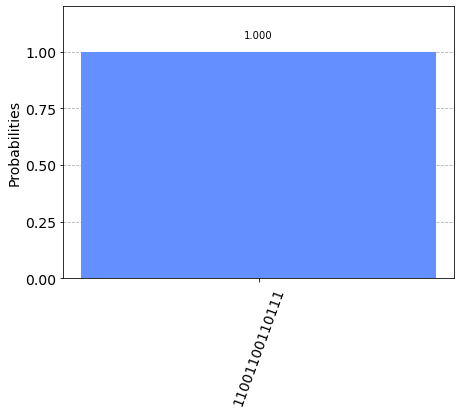

In [11]:
# use local simulator
backend = BasicAer.get_backend('qasm_simulator')
shots = 1
results = execute(bv_circuit, backend=backend, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)